# Calculating Climatologies

## Overview
Calculating climatologies in Python is a common task in geoscience workflows. This notebook will cover:

- Working with the [`Xarray`](https://docs.xarray.dev/en/stable/) module and it's [`groupby()`](https://docs.xarray.dev/en/stable/generated/xarray.DataArray.groupby.html) function
- A resource guide to point you to more detailed information depending on your use case

---

## Calculating Anomalies

You can use the [`groupby()`](https://docs.xarray.dev/en/stable/generated/xarray.DataArray.groupby.html) function to group the data by various timescales. From the [Xarray user guide](https://xarray.pydata.org/en/v2024.06.0/user-guide/time-series.html#datetime-indexing):
> Xarray also supports a notion of “virtual” or “derived” coordinates for datetime components implemented by pandas, including `year`, `month`, `day`, `hour`, `minute`, `second`, `dayofyear`, `week`, `dayofweek`, `weekday` and `quarter`. For use as a derived coordinate, xarray adds `season` to the list of datetime components supported by pandas.
>


In [1]:
from pythia_datasets import DATASETS
import xarray as xr
import matplotlib.pyplot as plt

filepath = DATASETS.fetch("CESM2_sst_data.nc")
ds = xr.open_dataset(filepath)
tos_monthly = ds.tos.groupby(ds.time.dt.month)
tos_clim = tos_monthly.mean(dim="time")
tos_anom = tos_monthly - tos_clim
tos_anom

/Users/amckeen/miniconda3/envs/geocat-applications/lib/python3.12/site-packages/xarray/conventions.py:286: SerializationWarning: variable 'tos' has multiple fill values {1e+20, 1e+20} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)


<xarray.DataArray 'tos' (time: 180, lat: 180, lon: 360)> Size: 47MB
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [-0.01402271, -0.01401687, -0.01401365, ..., -0.01406252,
         -0.01404917, -0.01403356],
        [-0.01544118, -0.01544476, -0.01545036, ..., -0.0154475 ,
         -0.01544321, -0.01544082],
        [-0.01638114, -0.01639009, -0.01639998, ..., -0.01635301,
         -0.01636147, -0.01637137]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
...
        [ 0.01727939,  0.01713431,  0.01698041, ...,  0.0176847 ,
          0.01755834,  0.01742125],
        [ 0.0173862 ,  0.0172919 ,  0.01719594, ...,  0.01766813,
          0.01757395,  0.01748013],
        [ 0.01693714,  0.01687253,  0.01680517, ...,  0.01709175,
          0.0170424 ,  0.01699162]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [ 0.01506364,  0.01491845,  0.01476014, ...,  0.01545238,
          0.0153321 ,  0.01520228],
        [ 0.0142287 ,  0.01412642,  0.01402068, ...,  0.0145216 ,
          0.01442552,  0.01432824],
        [ 0.01320827,  0.01314461,  0.01307774, ...,  0.0133611 ,
          0.0133127 ,  0.01326215]]], dtype=float32)
Coordinates:
  * time     (time) object 1kB 2000-01-15 12:00:00 ... 2014-12-15 12:00:00
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 3kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
    month    (time) int64 1kB 1 2 3 4 5 6 7 8 9 10 11 ... 3 4 5 6 7 8 9 10 11 12

In [2]:
# Plot the anomalies at the first time
tos_anom.isel(time=0).plot()

## Removing Annual Cycle

Also known as [seasonal adjustment](https://en.wikipedia.org/wiki/Seasonal_adjustment) or deseasonalization, it is often used to examine underlying trends in data with a repeating cycle. 

In [3]:
from pythia_datasets import DATASETS
import xarray as xr

filepath = DATASETS.fetch("CESM2_sst_data.nc")
ds = xr.open_dataset(filepath)
tos_monthly = ds.tos.groupby(ds.time.dt.month)
tos_clim = tos_monthly.mean(dim="time")
tos_anom = tos_monthly - tos_clim
tos_anom

/Users/amckeen/miniconda3/envs/geocat-applications/lib/python3.12/site-packages/xarray/conventions.py:286: SerializationWarning: variable 'tos' has multiple fill values {1e+20, 1e+20} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)


<xarray.DataArray 'tos' (time: 180, lat: 180, lon: 360)> Size: 47MB
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [-0.01402271, -0.01401687, -0.01401365, ..., -0.01406252,
         -0.01404917, -0.01403356],
        [-0.01544118, -0.01544476, -0.01545036, ..., -0.0154475 ,
         -0.01544321, -0.01544082],
        [-0.01638114, -0.01639009, -0.01639998, ..., -0.01635301,
         -0.01636147, -0.01637137]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
...
        [ 0.01727939,  0.01713431,  0.01698041, ...,  0.0176847 ,
          0.01755834,  0.01742125],
        [ 0.0173862 ,  0.0172919 ,  0.01719594, ...,  0.01766813,
          0.01757395,  0.01748013],
        [ 0.01693714,  0.01687253,  0.01680517, ...,  0.01709175,
          0.0170424 ,  0.01699162]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [ 0.01506364,  0.01491845,  0.01476014, ...,  0.01545238,
          0.0153321 ,  0.01520228],
        [ 0.0142287 ,  0.01412642,  0.01402068, ...,  0.0145216 ,
          0.01442552,  0.01432824],
        [ 0.01320827,  0.01314461,  0.01307774, ...,  0.0133611 ,
          0.0133127 ,  0.01326215]]], dtype=float32)
Coordinates:
  * time     (time) object 1kB 2000-01-15 12:00:00 ... 2014-12-15 12:00:00
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 3kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
    month    (time) int64 1kB 1 2 3 4 5 6 7 8 9 10 11 ... 3 4 5 6 7 8 9 10 11 12

Text(0.5, 0, 'Time (months)')

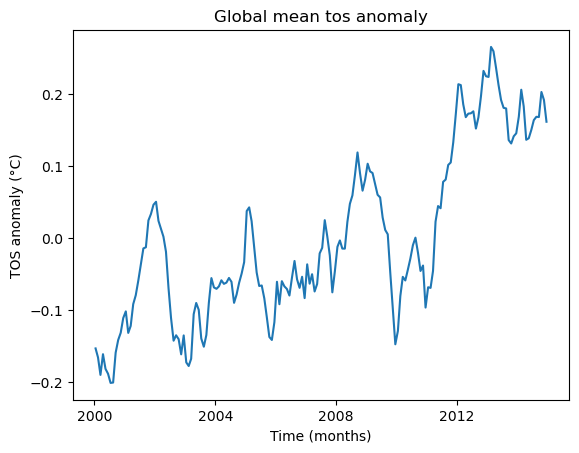

In [4]:
# Plot the Global mean TOS anomaly
tos_anom.mean(dim=["lat", "lon"]).plot()
plt.title("Global mean tos anomaly")
plt.ylabel("TOS anomaly (°C)")
plt.xlabel("Time (months)")

## Calculating Long Term Means

In [5]:
from pythia_datasets import DATASETS
import xarray as xr
import matplotlib.pyplot as plt

filepath = DATASETS.fetch("CESM2_sst_data.nc")
ds = xr.open_dataset(filepath)
tos_monthly = ds.tos.groupby(ds.time.dt.month)
tos_clim = tos_monthly.mean(dim="time")
tos_clim

/Users/amckeen/miniconda3/envs/geocat-applications/lib/python3.12/site-packages/xarray/conventions.py:286: SerializationWarning: variable 'tos' has multiple fill values {1e+20, 1e+20} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)


<xarray.DataArray 'tos' (month: 12, lat: 180, lon: 360)> Size: 3MB
array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [-1.780786 , -1.780688 , -1.7805718, ..., -1.7809757,
         -1.7809197, -1.7808627],
        [-1.7745041, -1.7744204, -1.7743237, ..., -1.77467  ,
         -1.774626 , -1.7745715],
        [-1.7691481, -1.7690798, -1.7690051, ..., -1.7693441,
         -1.7692844, -1.7692182]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
...
        [-1.7605033, -1.760397 , -1.7602725, ..., -1.760718 ,
         -1.7606541, -1.7605885],
        [-1.7544289, -1.7543424, -1.7542422, ..., -1.754608 ,
         -1.754559 , -1.7545002],
        [-1.7492163, -1.749148 , -1.7490736, ..., -1.7494118,
         -1.7493519, -1.7492864]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [-1.7711828, -1.7710832, -1.7709653, ..., -1.7713748,
         -1.7713183, -1.7712607],
        [-1.7648666, -1.7647841, -1.7646879, ..., -1.7650299,
         -1.7649865, -1.7649331],
        [-1.759478 , -1.7594113, -1.7593384, ..., -1.7596704,
         -1.7596117, -1.759547 ]]], dtype=float32)
Coordinates:
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 3kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
Attributes: (12/19)
    cell_measures:  area: areacello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    description:    This may differ from "surface temperature" in regions of ...
    frequency:      mon
    id:             tos
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Sea Surface Temperature
    type:           real
    units:          degC
    variable_id:    tos

Text(0.5, 0, 'Month')

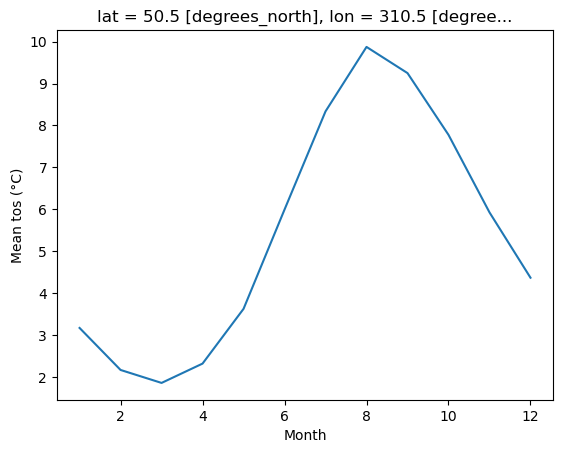

In [6]:
# Plot the long term mean for an example location
tos_clim.sel(lon=310, lat=50, method="nearest").plot()
plt.ylabel("Mean tos (°C)")
plt.xlabel("Month")

## Calculating Seasonal Means

From the [Xarray user guide](https://xarray.pydata.org/en/v2024.06.0/user-guide/time-series.html#datetime-indexing):
>The set of valid seasons consists of `‘DJF’`, `‘MAM’`, `‘JJA’` and `‘SON’`, labeled by the first letters of the corresponding months.
>
If you need to work with custom seasons, the [GeoCAT-comp package](https://geocat-comp.readthedocs.io/en/stable/getting-started.html) offers [`geocat.comp.climatologies.month_to_season()`](https://geocat-comp.readthedocs.io/en/stable/user_api/generated/geocat.comp.climatologies.month_to_season.html) which can be used to create custom three-month seasonal means.

In [7]:
from pythia_datasets import DATASETS
import xarray as xr
import matplotlib.pyplot as plt

filepath = DATASETS.fetch("CESM2_sst_data.nc")
ds = xr.open_dataset(filepath)
tos_seasonal = ds.tos.groupby(ds.time.dt.season)
tos_clim = tos_seasonal.mean(dim="time")
tos_clim

/Users/amckeen/miniconda3/envs/geocat-applications/lib/python3.12/site-packages/xarray/conventions.py:286: SerializationWarning: variable 'tos' has multiple fill values {1e+20, 1e+20} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)


<xarray.DataArray 'tos' (season: 4, lat: 180, lon: 360)> Size: 1MB
array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [-1.7796112, -1.779518 , -1.779407 , ..., -1.779786 ,
         -1.7797345, -1.7796829],
        [-1.7732689, -1.7731897, -1.7730962, ..., -1.7734209,
         -1.773382 , -1.7733315],
        [-1.767837 , -1.7677721, -1.7677007, ..., -1.768027 ,
         -1.7679691, -1.7679054]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
...
        [-1.7902642, -1.7901927, -1.7901045, ..., -1.7903785,
         -1.7903464, -1.7903149],
        [-1.7841699, -1.7841039, -1.7840254, ..., -1.7842804,
         -1.7842548, -1.7842187],
        [-1.7788147, -1.7787569, -1.7786926, ..., -1.7789872,
         -1.7789346, -1.7788768]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [-1.6898172, -1.6897992, -1.6897855, ..., -1.6898978,
         -1.6898724, -1.6898403],
        [-1.6898259, -1.6898205, -1.6898148, ..., -1.6898614,
         -1.6898499, -1.6898375],
        [-1.6884303, -1.6883883, -1.6883432, ..., -1.6885389,
         -1.688504 , -1.6884686]]], dtype=float32)
Coordinates:
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 3kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * season   (season) object 32B 'DJF' 'JJA' 'MAM' 'SON'
Attributes: (12/19)
    cell_measures:  area: areacello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    description:    This may differ from "surface temperature" in regions of ...
    frequency:      mon
    id:             tos
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Sea Surface Temperature
    type:           real
    units:          degC
    variable_id:    tos

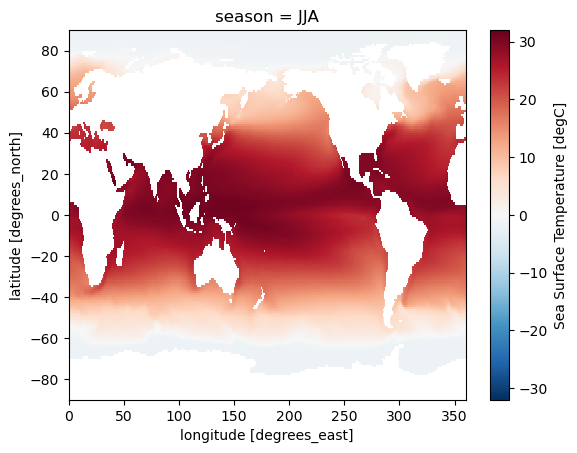

In [8]:
# Plot the JJA seasonal mean
tos_clim.sel(season="JJA").plot()

## Finding The Standard Deviation of Monthly Means

Calculate standard deviations in `Xarray` using the [`.std()`](https://docs.xarray.dev/en/latest/generated/xarray.DataArray.std.html) function. 

In [9]:
from pythia_datasets import DATASETS
import xarray as xr
import matplotlib.pyplot as plt

# Load the dataset
filepath = DATASETS.fetch("CESM2_sst_data.nc")
ds = xr.open_dataset(filepath)
stdMon = ds.tos.groupby(ds.time.dt.month).std()
stdMon

/Users/amckeen/miniconda3/envs/geocat-applications/lib/python3.12/site-packages/xarray/conventions.py:286: SerializationWarning: variable 'tos' has multiple fill values {1e+20, 1e+20} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)


<xarray.DataArray 'tos' (month: 12, lat: 180, lon: 360)> Size: 3MB
array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [0.0111143 , 0.01110211, 0.01108894, ..., 0.01114661,
         0.01113714, 0.01112626],
        [0.01120422, 0.01120154, 0.01119892, ..., 0.01121121,
         0.01120882, 0.01120653],
        [0.01111255, 0.01111323, 0.0111138 , ..., 0.01111099,
         0.01111163, 0.01111213]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
...
        [0.01198388, 0.01194896, 0.01191089, ..., 0.01207829,
         0.01204922, 0.01201763],
        [0.01188368, 0.01186803, 0.01185198, ..., 0.0119278 ,
         0.01191334, 0.01189866],
        [0.01157325, 0.01156648, 0.01155913, ..., 0.01159005,
         0.01158492, 0.01157935]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [0.01126678, 0.01123608, 0.0112022 , ..., 0.01135061,
         0.01132471, 0.01129662],
        [0.01123642, 0.01122155, 0.01120648, ..., 0.01127947,
         0.0112652 , 0.01125085],
        [0.01104772, 0.0110411 , 0.01103405, ..., 0.01106357,
         0.01105863, 0.01105339]]], dtype=float32)
Coordinates:
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 3kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
Attributes: (12/19)
    cell_measures:  area: areacello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    description:    This may differ from "surface temperature" in regions of ...
    frequency:      mon
    id:             tos
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Sea Surface Temperature
    type:           real
    units:          degC
    variable_id:    tos

In [10]:
# Plot the standard deviation of January means
stdMon.sel(month=1).plot()

## Curated Resources

To learn more about calculating climatologies in Python, we suggest:

- This [Climatematch Academy notebook](https://comptools.climatematch.io/tutorials/W1D1_ClimateSystemOverview/student/W1D1_Tutorial5.html) on Xarray Data Analysis and Climatology
- This [Project Pythia Foundations tutorial](https://foundations.projectpythia.org/core/xarray/computation-masking.html) on Computations and Masks with Xarray
- 